In [1]:
import os
import time
import tarfile

import imageio
import numpy as np
import tensordata.utils.request as rq
from tensordata.utils._utils import assert_dirs, path_join


def cifar10(root):
    """CIFAR10 image classification dataset from https://www.cs.toronto.edu/~kriz/cifar.html
    
    Each sample is an image (in 3D NDArray) with shape (32, 32, 3).
    
    Attention: if exist dirs `root/cifar10`, api will delete it and create it.
    Data storage directory:
    root = `/user/.../mydata`
    cifar10 data: 
    `root/cifar10/train/0/xx.png`
    `root/cifar10/train/2/xx.png`
    `root/cifar10/train/6/xx.png`
    `root/cifar10/test/0/xx.png`
    `root/cifar10/test/2/xx.png`
    `root/cifar10/test/6/xx.png`
    Args:
        root: str, Store the absolute path of the data directory.
              example:if you want data path is `/user/.../mydata/cifar10`,
              root should be `/user/.../mydata`.
    Returns:
        Store the absolute path of the data directory, is `root/cifar10`.
    """
    start = time.time()
    task_path = assert_dirs(root, 'cifar10')
    url = 'https://apache-mxnet.s3-accelerate.dualstack.amazonaws.com/gluon/dataset/cifar10/cifar-10-binary.tar.gz'
    rq.files(url, path_join(task_path, url.split('/')[-1]))
    with tarfile.open(path_join(task_path, url.split('/')[-1])) as t:
        t.extractall(task_path)
    noise_flie = os.listdir(task_path)
    for file in ['data_batch_1.bin', 'data_batch_2.bin', 'data_batch_3.bin', 'data_batch_4.bin', 'data_batch_5.bin']:
        with open(path_join(task_path, file), 'rb') as fin:
            data = np.frombuffer(fin.read(), dtype=np.uint8).reshape(-1, 3072+1)
            train = data[:, 1:].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
            train_label = data[:, 0].astype(np.int32)
        return train
        for i in set(train_label):
            os.makedirs(path_join(task_path, 'train', str(i)))
        for idx in range(train.shape[0]):
            imageio.imsave(path_join(task_path, 'train', str(train_label[idx]), str(idx)+'.png'), train[idx])
    for file in ['test_batch.bin']:
        with open(path_join(task_path, file), 'rb') as fin:
            data = np.frombuffer(fin.read(), dtype=np.uint8).reshape(-1, 3072+1)
            test = data[:, 1:].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
            test_label = data[:, 0].astype(np.int32)
        for i in set(test_label):
            os.makedirs(path_join(task_path, 'test', str(i)))
        for idx in range(test.shape[0]):
            imageio.imsave(path_join(task_path, 'test', str(test_label[idx]), str(idx)+'.png'), test[idx])
    for file in noise_flie:
        os.remove(path_join(task_path, file))
    print('cifar10 dataset download completed, run time %d min %.2f sec' %divmod((time.time()-start), 60))
    return task_path

t = cifar10('./')

In [3]:
t.shape

(10000, 32, 32, 3)

In [4]:
import linora as la

In [5]:
la.image.save_image(la.image.array_to_image(t[]))

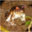

In [6]:
la.image.array_to_image(t[0,:,:,:])

In [41]:
import os
import shutil

__all__ = ['copy', 'exists', 'isdir', 'isfile', 'listdir', 'makedirs', 'remove', 'stat', 'walk']

def copy(src, dst, overwrite=False):
    """Copies data from src to dst.
    
    Note that the above will still result in an error if you try to overwrite a directory with a file.

    Note that you cannot copy a directory, only file arguments are supported.

    Args:
        src: string, name of the file whose contents need to be copied
        dst: string, name of the file to which to copy to
        overwrite: boolean, Whether to overwrite the file if existing file.
    """
    if exists(dst):
        if overwrite:
            if isdir(src):
                shutil.copytree(src, dst)
            else:
                shutil.copy(src, dst)
    else:
        if isdir(src):
            shutil.copytree(src, dst)
        else:
            shutil.copy(src, dst)

def exists(path):
    """Determines whether a path exists or not.
    Args:
        path: string, a path, filepath or dirpath.
    Returns:
        True if the path exists, whether it's a file or a directory. 
        False if the path does not exist and there are no filesystem errors.
    """
    return os.path.exists(path)

def isdir(path):
    """Returns whether the path is a directory or not.
    
    Args:
        path: string, path to a potential directory.
    Returns:
        True, if the path is a directory; False otherwise.
    """
    return os.path.isdir(path)

def isfile(path):
    """Returns whether the path is a regular file or not.
    
    Args:
        path: string, path to a potential file.
    Returns:
        True, if the path is a regular file; False otherwise.
    """
    return os.path.isfile(path)

def listdir(path):
    """Returns a list of entries contained within a directory.
    
    Args:
        path: string, path to a directory.
    Returns:
        [filename1, filename2, ... filenameN] as strings.
    Raises:
        errors. NotFoundError if directory doesn't exist.
    """
    return os.listdir(path)

def makedirs(path):
    """Creates a directory and all parent/intermediate directories.
    
    Args:
        path: string, name of the directory to be created.
    """
    return os.makedirs(path)

def remove(path):
    """Deletes a directory or file.
    
    Args:
        path: string, a path, filepath or dirpath.
    Raises:
        errors. NotFoundError if directory or file doesn't exist.
    """
    if isfile(path):
        return os.remove(path)
    return os.removedirs(path)

def rename(src, dst, overwrite=False):
    """Rename or move a file / directory.
    
    Args:
        src: string, pathname for a file.
        dst: string, pathname to which the file needs to be moved.
        overwrite: boolean, Whether to overwrite the file if existing file.
    """
    if exists(dst):
        if overwrite:
            return os.rename(src, dst)
    else:
        return os.rename(src, dst)
    
def stat(path):
    """Returns file or directory statistics for a given path.
    
    Args:
        path: string, a path, filepath or dirpath.
    Returns:
        FileStatistics struct that contains information about the path.
    """
    return os.stat(path)

def walk(top, topdown=True, onerror=None):
    """Recursive directory tree generator for directories.
    
    Args:
        top: string, a Directory name
        topdown: bool, Traverse pre order if True, post order if False.
        onerror: optional handler for errors. Should be a function, 
                 it will be called with the error as argument. 
                 Rethrowing the error aborts the walk. 
                 Errors that happen while listing directories are ignored.
    
    Returns:
        Yields, Each yield is a 3-tuple: the pathname of a directory, 
        followed by lists of all its subdirectories and leaf files. 
        That is, each yield looks like: (dirname, [subdirname, subdirname, ...], [filename, filename, ...]). 
        Each item is a string.
    """
    return os.walk(top, topdown, onerror)
rename('cifar10/data_batch_1.bin', 'batches.txt')

In [54]:
os.walk?

In [59]:
shutil.copytree?